In [22]:
import torch
from torchvision import transforms, models
import urllib

In [23]:
transform = transforms.Compose([ 
                                transforms.Resize(256), 
                                transforms.CenterCrop(224),
                                transforms.ToTensor(), 
                                transforms.Normalize(
mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])

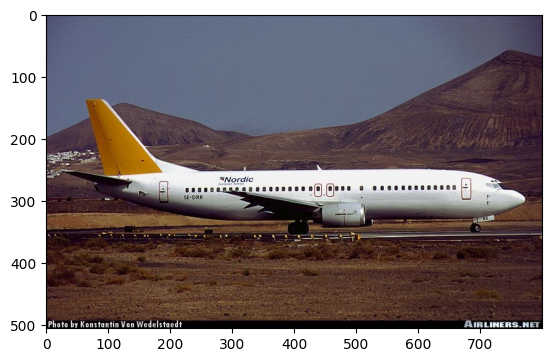

In [24]:
import matplotlib.pyplot as plt
from PIL import Image
img = Image.open('plane.jpg')
plt.imshow(img)

In [25]:
img_tensor = transform(img)
batch = img_tensor.unsqueeze(0)
model = models.resnet152(pretrained=True)

In [26]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [27]:
model.eval()
model.to(device)
y = model(batch.to(device))

In [28]:
url = 'https://pytorch.tips/imagenet-labels'
fpath = 'imagenet_class_labels.txt'
urllib.request.urlretrieve(url, fpath)
with open('imagenet_class_labels.txt') as f:
    classes = [line.strip() for line in f.readlines()]
# print(classes[985])

In [29]:
prob = torch.nn.functional.softmax(y, dim=1)[0] * 100 
_, indices = torch.sort(y, descending=True)
for idx in indices[0][:2]:
    print(classes[idx], prob[idx].item())

404: 'airliner', 98.4817123413086
908: 'wing', 1.3704278469085693
